In [48]:
#wap to find minimum using gradient descent
import numpy as np
import matplotlib.pyplot as plt

def gradient_descent(func, x, learning_rate, num_iterations):
    x_values=[]
    for i in range(num_iterations):
        gradient=func(x)
        x_values.append(x)
        x-=(learning_rate*gradient)
    return x,x_values

def function1(x):
    return 4*x**2+3*x+1
def derivative_f1(x):
    return 8*x+3

def function2(x):
    return x**2
def derivative_f2(x):
    return 2*x

x=10
learning_rate=0.1
num_iterations=25
min_x1, x_values1=gradient_descent(derivative_f1, x, learning_rate, num_iterations)
min_x2, x_values2=gradient_descent(derivative_f2, x, learning_rate, num_iterations)
print("For function: 4x^2+3x+1: ")
print("Minimum value of x:", min_x1)
print("For function: x^2: ")
print("Minimum value of x:", min_x2)

For function: 4x^2+3x+1: 
Minimum value of x: -0.37499999999999994
For function: x^2: 
Minimum value of x: 0.037778931862957166


In [49]:
def plot_gradient_descent(func, x, learning_rate, num_iterations, x_values):
    x_range = np.linspace(-10, 10, 400)
    y_range = func(x_range)
    plt.plot(x_range, y_range)
    plt.scatter(x_values, [func(x) for x in x_values], color='red', label="Gradient Descent Steps")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.grid(True)
    plt.show()

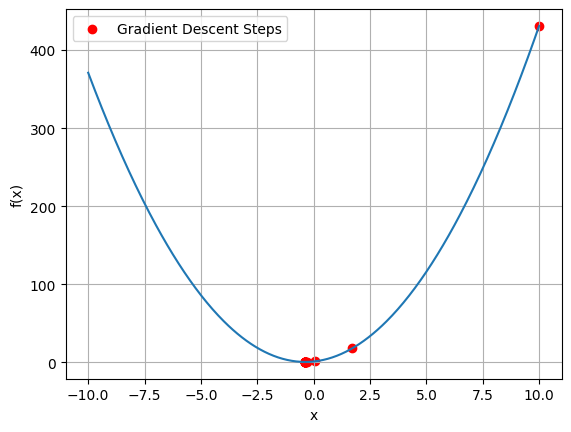

In [50]:
plot_gradient_descent(function1, x, learning_rate, num_iterations, x_values1)

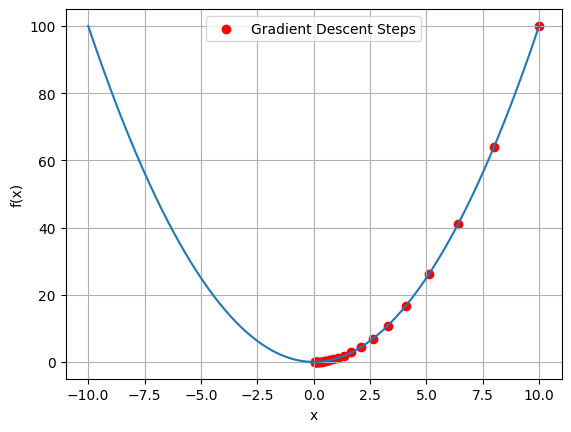

In [51]:
plot_gradient_descent(function2, x, learning_rate, num_iterations, x_values2)

In [26]:
#wap to predict the price of a bike using linear regression model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
df=pd.read_csv("Bike_Price.csv")

In [4]:
df.shape

(308, 10)

In [5]:
df.head()

,S.no,Bike_company,Bike_model,Manufactured_year,Engine_warranty,Engine_type,Fuel_type,CC(Cubic capacity),Fuel_Capacity,Price
0,1,Bajaj,Avenger 220,2020,5.0,Single,Petrol,220CC,10 Litres,113000
1,2,TVS,Apache RTR,2020,5.0,V-twin,Petrol,120CC,11 Litres,70000
2,3,Hero,Passion,2020,5.0,Boxer,Petrol,140CC,12 Litres,85000
3,4,Honda,Activa 3G,2020,5.0,Single,Petrol,150CC,13 Litres,90000
4,5,Suzuki,Access,2020,5.0,V-twin,Petrol,350CC,14 Litres,65000


In [6]:
#drop S.no in data
df.drop('S.no',axis=1,inplace=True)
df.head()

,Bike_company,Bike_model,Manufactured_year,Engine_warranty,Engine_type,Fuel_type,CC(Cubic capacity),Fuel_Capacity,Price
0,Bajaj,Avenger 220,2020,5.0,Single,Petrol,220CC,10 Litres,113000
1,TVS,Apache RTR,2020,5.0,V-twin,Petrol,120CC,11 Litres,70000
2,Hero,Passion,2020,5.0,Boxer,Petrol,140CC,12 Litres,85000
3,Honda,Activa 3G,2020,5.0,Single,Petrol,150CC,13 Litres,90000
4,Suzuki,Access,2020,5.0,V-twin,Petrol,350CC,14 Litres,65000


In [7]:
#finding unique values
df['Bike_company'].nunique()

25

In [9]:
df['Bike_model'].nunique()

237

In [10]:
df['Engine_type'].nunique()

6

In [11]:
df['Fuel_type'].nunique()

2

In [12]:
df['CC(Cubic capacity)'].nunique()

73

In [13]:
df['Fuel_Capacity'].nunique()

27

In [14]:
#target variable encoding
df['Bike_company']=df.groupby('Bike_company')['Price'].transform('mean')
df['Bike_model']=df.groupby('Bike_model')['Price'].transform('mean')
df['Engine_type']=df.groupby('Engine_type')['Price'].transform('mean')
df['Fuel_type']=df.groupby('Fuel_type')['Price'].transform('mean')
df['CC(Cubic capacity)']=df.groupby('CC(Cubic capacity)')['Price'].transform('mean')
df['Fuel_Capacity']=df.groupby('Fuel_Capacity')['Price'].transform('mean')

In [15]:
df.head()

,Bike_company,Bike_model,Manufactured_year,Engine_warranty,Engine_type,Fuel_type,CC(Cubic capacity),Fuel_Capacity,Price
0,209166.666667,113000.000000,2020,5.0,209231.345679,290450.476744,121299.200000,94000.0,113000
1,101312.500000,75000.000000,2020,5.0,200481.135802,290450.476744,67142.857143,98939.8,70000
2,74944.157895,82000.000000,2020,5.0,235301.587629,290450.476744,173975.000000,77960.0,85000
3,82155.875000,88666.666667,2020,5.0,209231.345679,290450.476744,86779.560000,81892.0,90000
4,358419.750000,65500.000000,2020,5.0,200481.135802,290450.476744,305769.187500,75319.8,65000


In [16]:
#normalization
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df1=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df1

,Bike_company,Bike_model,Manufactured_year,Engine_warranty,Engine_type,Fuel_type,CC(Cubic capacity),Fuel_Capacity,Price
0,0.167208,0.036416,0.983766,0.062500,0.025718,1.0,0.034236,0.027686,0.036416
1,0.044845,0.014451,0.983766,0.062500,0.014103,1.0,0.002703,0.033046,0.011561
2,0.014929,0.018497,0.983766,0.062500,0.060323,1.0,0.064906,0.010279,0.020231
3,0.023111,0.022351,0.983766,0.062500,0.025718,1.0,0.014137,0.014546,0.023122
4,0.336540,0.008960,0.983766,0.062500,0.014103,1.0,0.141642,0.007414,0.008671
...,...,...,...,...,...,...,...,...,...
303,0.023265,0.018449,0.982143,0.020833,0.060323,1.0,0.007615,0.247540,0.018449
304,0.023265,0.018882,0.982143,0.020833,0.060323,1.0,0.006932,0.235398,0.018882
305,0.023265,0.019316,0.982143,0.020833,0.060323,1.0,0.007615,0.325572,0.019316
306,0.023265,0.019749,0.982143,0.020833,0.060323,1.0,0.006932,0.295967,0.019749


In [17]:
y=df1['Price']
x=df1.drop('Price',axis=1)
y.shape,x.shape

((308,), (308, 8))

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((215, 8), (93, 8), (215,), (93,))

In [19]:
x_train=x_train.fillna(0)
x_test=x_test.fillna(0)

In [20]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [21]:
model.intercept_

-0.01189549659371579

In [22]:
model.coef_

array([-1.39298690e-02,  9.27057780e-01,  4.02388557e-03,  1.94105185e-02,
        9.64392550e-03,  1.40271016e-04,  7.27901077e-02,  4.19445688e-02])

In [23]:
model.score(x_test,y_test)

0.9473133201451698